- Natalie Belford
- When Data Attacks
- 10.14.2023
- IDC6210
- Final Capstone Group Project

# **When Data Attacks**
# **IDC6210 Kaggle Group Capstone Project**
# **Project Details**

# Description
Telecon Customer Churn Prediction


# Goal
Use historical customer data to develop machine learning models that can predict customer churn effectively.


# File Path
kaggle competitions download -c uwf-ml-for-ds-fall-2023-capstone-project


# Task
Build predictive models that can accurately predict whether a Telecon customer will churn or not based on historical customer data


# Competition Description
Customer churn is a critical issue for telecommunication companies. 
Losing customers to churn can lead to significant revenue loss and impact the company's growth. 
Therefore, it is essential to predict potential churners accurately and take proactive measures to retain them. 


# Dataset
Dataset consists of various customer attributes, such as customer demographics, subscription details, service usage, and billing information. 
Dataset is divided into two parts: training data (train.csv) and testing data (test.csv). 
Participants are required to build their predictive models using training data and submit predictions for testing data.


# Target Variable
"Churn" column indicates whether the customer churned (1) or not (0).


# File Descriptions

- train.csv: Contains the training set data.
- test.csv: Contains the test set data.
- - Natalie Belford
- When Data Attacks
- 10.14.2023
- IDC6210
- Final Capstone Group Project- Natalie Belford
- When Data Attacks
- 10.14.2023
- IDC6210
- Final Capstone Group Project- Natalie Belford
- When Data Attacks
- 10.14.2023
- IDC6210
- Final Capstone Group Projectsample_solution.csv: Contains a sample solution file in the correct format, demonstrating the ground truth data for scoring the submissions.

Column Definitions:
- ID: Unique identifier for each customer data instance.
- gender: Categorical variable representing the gender of the customer.
- SeniorCitizen: Binary variable indicating if the customer is a senior citizen (1) or not (0).
- Partner: Categorical variable indicating if the customer has a partner or not.
- Dependents: Categorical variable indicating if the customer has dependents or not.
- tenure: Continuous variable representing the number of months the customer has been with the company.
- PhoneService: Categorical variable indicating if the customer has phone service or not.
- MultipleLines: Categorical variable indicating the type of phone service the customer has (e.g., single line, multiple lines).
- InternetService: Categorical variable indicating the type of internet service the customer has (e.g., DSL, fiber optic).
- OnlineSecurity: Categorical variable indicating if the customer has online security or not.
- OnlineBackup: Categorical variable indicating if the customer has online backup or not.
- DeviceProtection: Categorical variable indicating if the customer has device protection or not.
- TechSupport: Categorical variable indicating if the customer has tech support or not.
- StreamingTV: Categorical variable indicating if the customer has streaming TV or not.
- StreamingMovies: Categorical variable indicating if the customer has streaming movies or not.
- Contract: Categorical variable representing the type of contract the customer has (e.g., month-to-month, one year, two year).
- PaperlessBilling: Categorical variable indicating if the customer has opted for paperless billing or not.
- PaymentMethod: Categorical variable representing the payment method used by the customer.
- MonthlyCharges: Continuous variable representing the monthly charges for the customer.
- TotalCharges: Continuous variable representing the total charges for the customer.
- Churn: Target variable column indicating if the customer churned (1) or not (0).


# Evaluation Metric
Submissions evaluated based on Area Under the Receiver Operating Characteristic Curve (AUC). 
AUC: commonly used metric to evaluate performance of binary classification models
Measures trade-off between true positive rate (sensitivity) and false positive rate (1-specificity)


# Current Benchmark
AUC score of 0.72177


# Submission Format
For each ID in the testing data, predict probability of customer churn
Submission file (submission.csv) should have two columns: 'ID' and 'Churn'
'Churn' column should contain the predicted probabilities for customer churn


# Deliverables
- Submission csv
beat benchmark AUC: 40% of grade: ability to achieve an AUC score higher than the current benchmark of 0.72177.

- Video
Video should be hosted on Google Drive or YouTube; 15 minutes long.
Video should be in format of:
     - explaining the problem
     - findings
     - proposed solution to a technical manager
     - participants should provide suggestions based on their analysis

- Notebook.md
Complete Notebook with Visualization and Report: 30% of grade: quality of Jupyter Notebook (ipynb) report
Notebook should serve as report.
Include:
     - information and visualizations about problem 
     - data exploration
     - modeling process
Justify choices of models, features, and hyperparameters
Hyperparameter tuning is encouraged to improve model performance

- Presentation Link
Include link to presentation video within first line of Jupyter Notebook


# Submission Details

Download final Notebook from Kaggle and upload in Canvas

Submission should be one per group of 3 by group leader within Kaggle 

Group leader should be identified in Canvas Discussion Thread

# Import Libraries and Packages

- To begin the project, we want to import the libraries we will be using throughout the analysis.

In [1]:
import numpy as np # linear algebra import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib #enables deletion of old files
import os
import pandas as pd
import matplotlib.pyplot as plt

from termcolor import colored #provides depth to the code with colored output
from sklearn.compose import ColumnTransformer #modify individual columns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, auc


# ****Project Tasks****

# 1. **Data Exploration:** Start by exploring the dataset, understanding the features, and identifying any missing values or inconsistencies. 


---
***Explanations and Rationale***  
Throughout the several runs of the notebook, I found it challenging to keep track of the most recent file to be created. The solution is the `os.remove()` function. Having this file at the beginning of the code ensures that the folder is empty when the code begins, so the only files in the "/kaggle/working" folder by the end of execution will be those files created during the current run.

In order for us to implement this, we must specify which files we want to delete. Since this notebook only creates `.csv` files, it is designed to delete only `.csv` files. If you want to adapt this code to delete **all** files, you change the value of `files_to_delete` to `./*`.


***Explanation of code***
* `.glob()`: used to find all the pathnames matching the pattern passed as a parameter and make them into a list. 
* `.getcwd()`: "Get current working directory" this is where your files are being saved
* `pathlib.Path()`: simply returns a nicely formatted path to the path parameters you pass.
* `remove()`: deletes the file
* `colored()`: Colored allows us to add depth to our print statements. By switching colors between "blue" and "green" on alternating statements, we can more easily read the console and determine where one statement ends and the next begins. This is particularly helpful with multiline prints. Colored takes in two parameters: the string to be printed and the color to be displayed. 

***Notes:***
This is a great approach to keep your outputs clean and relevant to only the most recent run. However, it should be noted that deleted files cannot be recovered, so use it cautiously. 

In [2]:
# # Delete old kaggle output files
# files_to_delete = './*.csv'
# files_list = pathlib.Path(os.getcwd()).glob(files_to_delete)
# for file_path in files_list:
#     os.remove(file_path)
    
# print(colored("Output files cleaned.", "blue"))

---

***Explanations and Rationale***

bla bla bla

***Explanation of Code***

bla bla bla

***Notes:*** bla bla bla

In [3]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#        print(os.path.join(dirname, filename))

---

***Explanations and Rationale***

The initial task is to import the datasets from the paths provided by Kaggle. The paths for this notebook are `/kaggle/input/churn-ds/train.csv` and `/kaggle/input/churn-ds/test.csv`.

The purpose of the code is to read the train dataset from its CSV file and store it in a DataFrame for future operations. After that, the code prints the DataFrame contents in blue to visually validate the imported data.

***Explanation of Code***

- `pd.read_csv()`: This Pandas method reads a .csv file from the provided filepath and converts it into a DataFrame.

***Notes:*** Upon visual inspection of the printed DataFrame, no missing values are easily apparent.

In [4]:
#import the dataset
#raw_train_df = pd.read_csv('/kaggle/input/churn-ds/train.csv')
raw_train_df = pd.read_csv('./train.csv')
#validate df contents
print(colored(raw_train_df, 'blue'))

        ID  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3739  4950-BDEUX    Male              0      No         No      35   
1     3152  7993-NQLJE    Male              0     Yes        Yes      15   
2     4861  7321-ZNSLA    Male              0     Yes        Yes      13   
3     3868  4922-CVPDX  Female              0     Yes         No      26   
4     3811  2903-YYTBW    Male              0     Yes        Yes       1   
...    ...         ...     ...            ...     ...        ...     ...   
5629  6304  6308-CQRBU  Female              0     Yes         No      71   
5630  6228  2842-JTCCU    Male              0      No         No       2   
5631  4674  6402-ZFPPI  Female              1      No         No      25   
5632  2711  3594-BDSOA  Female              0     Yes         No      24   
5633  5640  6490-FGZAT    Male              0      No         No       6   

     PhoneService     MultipleLines InternetService  ...     DeviceProtection  \
0     

---
***Explanations and Rationale***  
Now, we are getting to know our data. Glancing at the small subset of values in the previous command must be more extensive to verify that the dataset contains all the values. 
We obtain a list of the missing values in each row with the first `.isnull().sum()` command. We can then sum this entire list to get a total count of all the dataset's missing values. 

***Explanation of code***
* `isnull()`: This method creates a boolean table the same size as the data frame it was called on. Elements with `True` are those with a missing value. 
* `sum()`: This method adds up all the values. If you do not specify a dimension, then it will reduce the dimensions; so, a 2D matrix returns a 1D vector that is the sum of every column in that matrix. Calling sum on the subsequent vector would reduce the 1D vector would result is a single scaler.

***Notes:***
Our data is good to go! (Or is it?)

In [5]:
#check for missing features
missing_features_per_col = raw_train_df.isnull().sum()
total_missing_features = missing_features_per_col.sum()

print(colored(f'Total Missing Training Values: {total_missing_features}', 'blue'))

Total Missing Training Values: 0


# 2. **Preprocessing and Feature Engineering:** Perform necessary preprocessing steps such as handling missing data, encoding categorical variables, and scaling features. Consider feature selection techniques to enhance model performance.

---

***Explanations and Rationale***

This code block focuses on feature selection by removing uninformative or redundant columns from the DataFrame. Specifically, it eliminates the `ID` and `customerID` columns to reduce noise and improve the effectiveness of any subsequent machine learning model. `ID` and `customerID` are administrative numbers for identifying users, but it doesn't hold any information that can help make classifications; as such, they are omitted.

***Explanation of Code***

- `.drop()`: Drops the specified columns from the DataFrame. 
 - `columns=[]` tells which columns to drop

***Notes:***
We validate the output to ensure our intended columns have been dropped. 

In [6]:
#before drop
print(colored(raw_train_df.columns, 'blue'))

cleaned_train_df = raw_train_df.drop(columns=['ID', 'customerID'])

#after drop
print(colored(cleaned_train_df.columns, 'green'))

Index(['ID', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


---

***Explanations and Rationale***

bla bla bla

***Explanation of Code***

bla bla bla

***Notes:*** bla bla bla

In [7]:
# Check if any non-numeric values are present by attempting to cast to float
def check_numeric(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

non_numerics = cleaned_train_df['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

# Replace cells with only whitespace in 'TotalCharges' with 0
cleaned_train_df['TotalCharges'] = cleaned_train_df['TotalCharges'].apply(lambda x: 0 if str(x).strip() == '' else x)

# Check again
non_numerics = cleaned_train_df['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

TotalCharges has non-numeric values: 8
TotalCharges has non-numeric values: 0


In [8]:
X = cleaned_train_df.iloc[:, :-1]

#split X into numerical values and OHE values
NUMERICAL_FEATURES = [1, 4, 17, 18]
OHE_FEATURES = [0, 2, 3, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14, 15, 16]

X_numerical = X.iloc[:, NUMERICAL_FEATURES].values
X_ohe = X.iloc[:, OHE_FEATURES].values

#confirm the same shape
print(colored(X.shape, 'blue'))
print(colored(X_numerical.shape, 'green'))
print(colored(X_ohe.shape, 'blue'))

(5634, 19)
(5634, 4)
(5634, 15)


In [9]:
#OHE X features
one_hot_encoder = OneHotEncoder(categories='auto', drop='first')
X_ohe = X.iloc[:, OHE_FEATURES].values


#view the change in columns
print(colored(X_ohe.shape, 'blue'))
X_ohe = one_hot_encoder.fit_transform(X_ohe)
X_ohe = X_ohe.toarray()
print(colored(X_ohe.shape, 'green'))

(5634, 15)
(5634, 26)


In [10]:
#split into train and test X and y are also dataframes
print(colored(X_ohe.shape, 'green'))
print(colored(X_numerical.shape, 'green'))

X = np.concatenate((X_ohe, X_numerical), axis=1)
y = cleaned_train_df.iloc[:, -1]

#split training and tests sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

#validate the stratify command
print(colored(f'Labels counts in y: {np.bincount(y)}', 'blue'))
print(colored(f'Labels counts in y_train: {np.bincount(y_train)}', 'green'))
print(colored(f'Labels counts in y_test: {np.bincount(y_test)}', 'blue'))

(5634, 26)
(5634, 4)
Labels counts in y: [4139 1495]
Labels counts in y_train: [2897 1046]
Labels counts in y_test: [1242  449]


---

***Explanations and Rationale***

This code block uses Principal Component Analysis (PCA) as a baseline for hyperparameter tuning. By setting a threshold for explained variance, the code filters out components that contribute less to the variance and thus can be considered less important. This serves as a starting point for dimensionality reduction. Notice how we can remove 11 features and still retain over 98% data integrity. 

***Explanation of Code***

- `PCA()`: Initializes the PCA object with default params.
- `explained_variance_ratio_`: Retrieves the explained variance ratio of each component.
  
***Notes:***
The code outputs the number of components to delete and to keep, as well as the percentage of data integrity retained after applying the threshold. This provides valuable insights into how much of the original data's variance is maintained, which is critical for model performance.



In [11]:
PCA_THRESHOLD = 0.01
DECIMAL_TO_PERCENT = 100 

pca_std_sc = StandardScaler()
X_train_std = pca_std_sc.fit_transform(X_train, y_train)

#use PCA to determine how many columns to keep as a base line for hyper tuning
pca = PCA()
pca.fit(X_train_std)
evr = pca.explained_variance_ratio_

num_to_delete = 0
cum_sum = 0.0
for i,  element in enumerate(evr):
    if element < PCA_THRESHOLD:
        num_to_delete += 1
        cum_sum += element
        
importance_values = np.sum(np.abs(pca.components_), axis=0)
asc_importance_indexes = np.argsort(importance_values)
indexes_to_delete = asc_importance_indexes[:num_to_delete]

num_to_keep = X_train_std.shape[1] - num_to_delete        

print(colored(f'Indexes to Delete: {indexes_to_delete}', 'blue'))
print(colored(f'Number to Delete: {num_to_delete}', 'green'))
print(colored(f'Number to Keep: {num_to_keep}', 'blue'))
print(colored(f'Data integrity: {(1 - cum_sum) * DECIMAL_TO_PERCENT}', 'green'))

Indexes to Delete: [ 0 28  8  7 10 20 25  3  4 12 29]
Number to Delete: 11
Number to Keep: 19
Data integrity: 98.09684418542703


# 3. **Model Training and Evaluation:** Train different classifiers such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM) on the preprocessed dataset. Evaluate their performance using appropriate metrics and select the best-performing model.

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from termcolor import colored

def plot_auc_curve(model):
    global X_test, y_test  # Using global variables
    
    # Check if the model has 'decision_function' or 'predict_proba'
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plotting the ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # 45-degree line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    print(colored(f"Area Under the Curve (AUC): {roc_auc:.6f}", 'green'))

    return roc_auc

In [13]:
ppn_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classify__alpha': np.logspace(-4, 4, 100)
}

# Define pipeline for LDA
ppn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reduce_dim', LDA()),
    ('classify', SGDClassifier(loss='perceptron'))
])

---

***Explanations and Rationale***

The code snippet focuses on implementing a Perceptron model using the Stochastic Gradient Descent (SGD) classifier. The model performed best on the normalized version of the training set. This model was tested with all variations of LDA, PDA, and unscaled; unreduced datasets consistently had the highest scores. Here, and in all the following models, we assign the training and testing sets to a single local variable name to allow us to change which set will be used within the model and update to a single line of code. 

***Explanation of Code***

* `SGDClassifier()`: Initializes the Perceptron model using the SGD classifier.
  * `loss='perceptron'`: Sets the loss function to perceptron.
* `.fit()`: This is doing the actual "training" of the model. This is how it learns. 🎓
* `.score()`: Computes the accuracy of the model.

***Notes:***
Normalization is a way to reduce all values between 0 and 1.

Best PPN: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('reduce_dim', LinearDiscriminantAnalysis()),
                ('classify',
                 SGDClassifier(alpha=3.351602650938848, loss='perceptron'))])


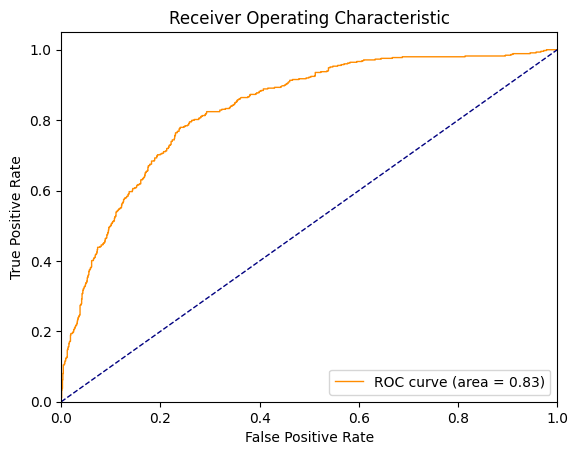

Area Under the Curve (AUC): 0.832754


In [14]:
#perceptron 🧠
ppn_grid = GridSearchCV(ppn_pipeline, param_grid=ppn_param_grid, cv=10, n_jobs=-1)
ppn_grid.fit(X_train, y_train)

ppn = ppn_grid.best_estimator_

print(colored(f'Best PPN: {ppn}', 'blue'))
ppn_roc_auc = plot_auc_curve(ppn)

In [15]:
# Define an exhaustive parameter grid
log_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__C': np.logspace(-4, 4, 200),
    'classifier__solver': ['lbfgs', 'sag', 'saga'],
    'classifier__penalty': ['l2', 'None'],
}

# Define the pipeline
log_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=10000))
])

Best Log: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=3.489101213406774, max_iter=10000))])


c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
12000 fits failed out of a total of 24000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1105 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nathan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\N

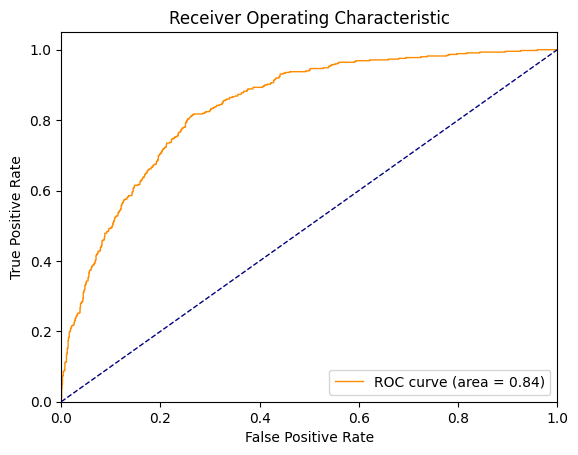

Area Under the Curve (AUC): 0.839290


In [16]:
#Logistic Regression 🪵
log_grid = GridSearchCV(log_pipeline, param_grid=log_param_grid, cv=10, n_jobs=-1)
log_grid.fit(X_train, y_train)

log = log_grid.best_estimator_

print(colored(f'Best Log: {log}', 'blue'))
log_roc_auc = plot_auc_curve(log)

In [17]:
# Define the pipeline for Decision Tree
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

# Define an exhaustive parameter grid for Decision Tree
tree_param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

Best Decision Tree: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=4,
                                        min_samples_split=10,
                                        splitter='random'))])


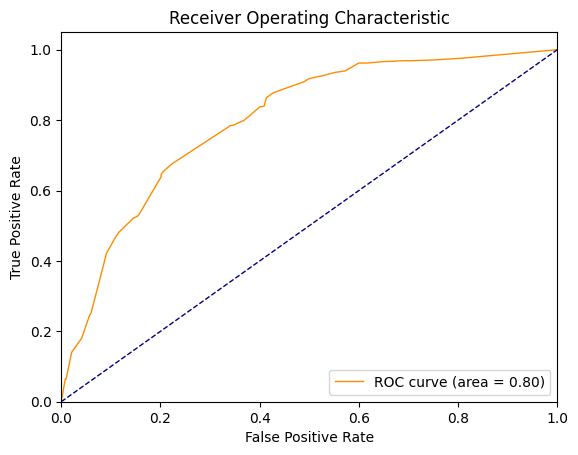

Area Under the Curve (AUC): 0.798741


In [18]:
# Create the Grid Search object for Decision Tree
tree_grid = GridSearchCV(tree_pipeline, param_grid=tree_param_grid, cv=10, n_jobs=-1)
tree_grid.fit(X_train, y_train)

# Get the best estimator
tree = tree_grid.best_estimator_

# Display and plot
print(colored(f'Best Decision Tree: {tree}', 'blue'))
tree_roc_auc = plot_auc_curve(tree)

In [19]:
# Define an exhaustive parameter grid
forest_param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300, 400, 500],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Define the pipeline
forest_pipeline = Pipeline([
    ('classifier', RandomForestClassifier())
])


Best Random Forest: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=500))])


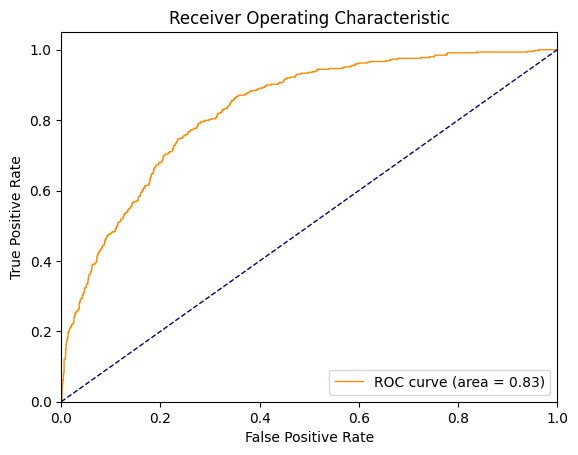

Area Under the Curve (AUC): 0.829586


In [20]:
#Random Forest 🌲
forest_grid = GridSearchCV(forest_pipeline, param_grid=forest_param_grid, cv=10, n_jobs=-1)
forest_grid.fit(X_train, y_train)

forest = forest_grid.best_estimator_

# Display and plot
print(colored(f'Best Random Forest: {forest}', 'blue'))
forest_roc_auc = plot_auc_curve(forest)

In [21]:
# Define an exhaustive parameter grid
svm_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['auto', 'scale']
}

# Define the pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True))  # Enabling probability estimates for plotting AUC
])

In [22]:
# # Support Vector Machine (SVM) 🌐
# svm_grid = GridSearchCV(svm_pipeline, param_grid=svm_param_grid, cv=10, n_jobs=-1)
# svm_grid.fit(X_train, y_train)

# svm = svm_grid.best_estimator_

# # Display and plot
# print(colored(f'Best SVM: {svm}', 'blue'))
# svm_roc_auc = plot_auc_curve(svm)

In [23]:
knn_param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Define the pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])  

Best k-NN: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=11))])


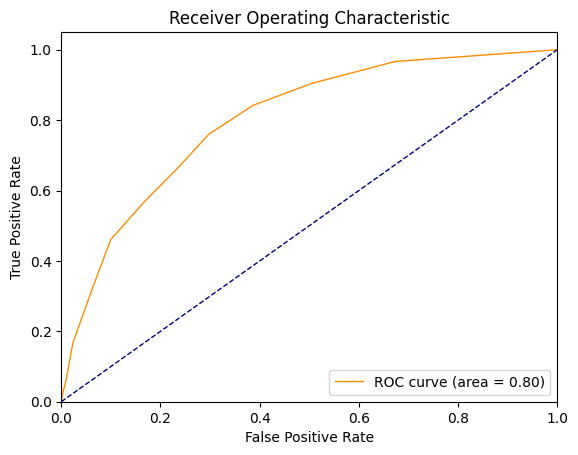

Area Under the Curve (AUC): 0.800365


In [24]:
# k-Nearest Neighbors (k-NN) 🏠
knn_grid = GridSearchCV(knn_pipeline, param_grid=knn_param_grid, cv=10, n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn = knn_grid.best_estimator_

# Display and plot
print(colored(f'Best k-NN: {knn}', 'blue'))
knn_roc_auc = plot_auc_curve(knn)

In [25]:
#create df of model results

#DF labels
MODEL_TYPES = ['ppn', 'log', 'tree', 'forest', 'knn']
ACCURACY_TYPES = ['ROC-AUC']

# Results
results = [
    [ppn_roc_auc],
    [log_roc_auc],
    [tree_roc_auc],
    [forest_roc_auc],
    [knn_roc_auc],
]

# Create the DataFrame
model_results_df = pd.DataFrame(results, columns=ACCURACY_TYPES, index=MODEL_TYPES)

#display results
print(colored(model_results_df, 'blue'))

         ROC-AUC
ppn     0.832754
log     0.839290
tree    0.798741
forest  0.829586
knn     0.800365


In [26]:
#select best model

#determine which model did best on the test set
optimal_label = model_results_df['ROC-AUC'].idxmax()

model_map = {
    'log': log_grid,
    'tree': tree_grid,
    'forest': forest_grid,
    'knn': knn_grid
}
# Fetch the optimal model based on the label
optimal_model = model_map.get(optimal_label, None)

best_result = model_results_df.loc[optimal_label, 'ROC-AUC']
    
print(colored(f'Best Model: {optimal_label}', 'green'))
print(colored(f'Result: {best_result}', 'blue'))

Best Model: log
Result: 0.8392903894501649


In [27]:
START_INDEX = 1

test_df = pd.read_csv('./test.csv')

#Select features
ids = test_df.iloc[:, 0].values
test = test_df.drop(columns=['ID', 'customerID'])

#validate contents
print(colored(f'IDs:\n {ids}', 'blue'))
print(colored(f'\nFeatures:\n {test}', 'green'))

IDs:
 [ 438 2281 2236 ... 3858 4759 5614]

Features:
       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       Male              0     Yes        Yes      72          Yes   
1     Female              1      No         No       8          Yes   
2     Female              0     Yes        Yes      41          Yes   
3       Male              0     Yes         No      18          Yes   
4     Female              0     Yes         No      72          Yes   
...      ...            ...     ...        ...     ...          ...   
1404  Female              0     Yes        Yes      49          Yes   
1405    Male              0     Yes        Yes      28          Yes   
1406    Male              0      No         No       5          Yes   
1407  Female              0      No         No      56          Yes   
1408  Female              0     Yes        Yes      72          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
0            

In [28]:
non_numerics = test['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

# Replace cells with only whitespace in 'TotalCharges' with 0
test['TotalCharges'] = test['TotalCharges'].apply(lambda x: 0 if str(x).strip() == '' else x)

# Check again
non_numerics = test['TotalCharges'].apply(lambda x: not check_numeric(str(x).strip())).sum()
print(f"TotalCharges has non-numeric values: {non_numerics}")

TotalCharges has non-numeric values: 3
TotalCharges has non-numeric values: 0


In [29]:
test_numerical = test.iloc[:, NUMERICAL_FEATURES].values
test_ohe = test.iloc[:, OHE_FEATURES].values 

test_ohe = one_hot_encoder.transform(test_ohe).toarray()
        
test = np.concatenate((test_ohe, test_numerical), axis=1)

print(colored(f'Formatted Shape: {test.shape}', 'blue'))

Formatted Shape: (1409, 30)


In [31]:
#obtain predictions from our unlabeled data
results = optimal_model.predict(test)

#validate results
print(colored(f'Results: {results}', 'blue'))

#Create a .csv file of the predictions and their IDs
submission = pd.DataFrame(list(zip(ids, results)), columns=['ID','Churn'])
submission.to_csv(optimal_label + '_submission_' + str(round(best_result, 4)) + '.csv', index=False)

Results: [0 1 0 ... 0 0 0]


# Chosen Classifier: Log
I would use any classifier that performs well, as implemented in my code. However, my top-performing model was Logistic Regression, which I submitted to Kaggle. 